<h1 style="text-align :center;">Analyse des risques li√©s aux avions</h1>

#### Importation des bibliotheque

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Chargement des donne√©s

In [ ]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Sby\cours en ligne\Data science\archive (1)\AviationData.csv",encoding="latin1")
data.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_6368\849071530.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\HP\Desktop\Sby\cours en ligne\Data science\archive (1)\AviationData.csv",encoding="latin1")


Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

#### Description des donne√©s

In [12]:
data.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [13]:
data.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  Uni

#### Exploration et nettoyage des donn√©es

In [ ]:

# Gestion des valeur manquantes
data.fillna({'Weather.Condition': 'UNK', 'Broad.phase.of.flight': 'UNKNOWN'}, inplace=True)

# Filtrer les colonnes important
colonne = ['Make', 'Model', 'Injury.Severity', 'Aircraft.damage', 
        'Weather.Condition', 'Broad.phase.of.flight', 'Total.Fatal.Injuries']
data = data[colonne]
#Gestion de la modalit√© unknow
data["Broad.phase.of.flight"]=data['Broad.phase.of.flight'].str.lower()

# Creation de Categories pour la variable severity
def categorize_severity(row):
    if row['Total.Fatal.Injuries'] > 0:
        return 'Fatal'
    elif row['Injury.Severity'] == 'Non-Fatal':
        return 'Non-Fatal'
    else:
        return 'No Injuries'

data['Severity'] = data.apply(categorize_severity, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_6368\2783020764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna({'Weather.Condition': 'UNK', 'Broad.phase.of.flight': 'UNKNOWN'}, inplace=True)


#### Analyse des Donn√©es

##### 1- Mod√®les d‚Äôavions selon la gravit√© des accidents

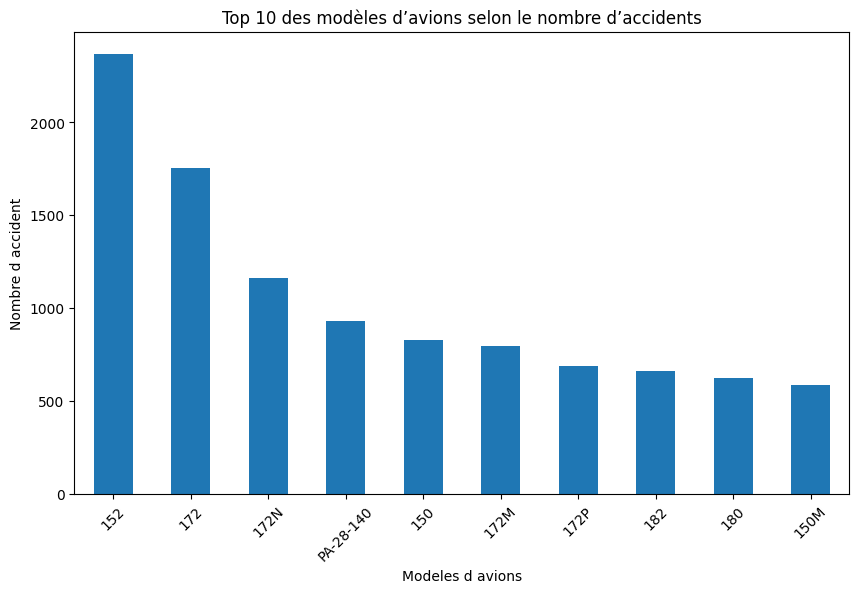

In [15]:
model_counts = data['Model'].value_counts().head(10)
plt.figure(figsize=(10,6))
model_counts.plot(kind='bar')
plt.title("Top 10 des mod√®les d‚Äôavions selon le nombre d‚Äôaccidents")
plt.ylabel('Nombre d accident')
plt.xlabel('Modeles d avions')
plt.xticks(rotation=45)
plt.show()

##### 2- Gravit√© des accidents selon les conditions m√©t√©orologiques

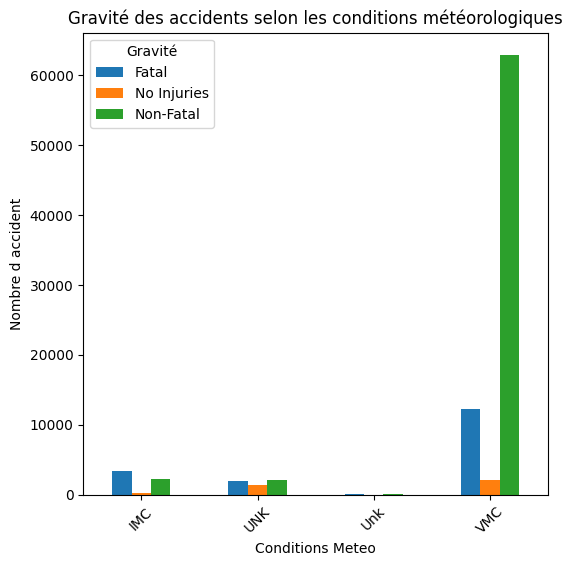

In [18]:

Cond_Meteo = pd.crosstab(data['Weather.Condition'], data['Severity'])
Cond_Meteo.plot(kind='bar',  figsize=(6,6))
plt.title('Gravit√© des accidents selon les conditions m√©t√©orologiques')
plt.ylabel('Nombre d accident')
plt.xlabel('Conditions Meteo')
plt.xticks(rotation=45)
plt.legend(title='Gravit√©')
plt.show()

##### 3- Les phases de vol pr√©sentant le plus de risques

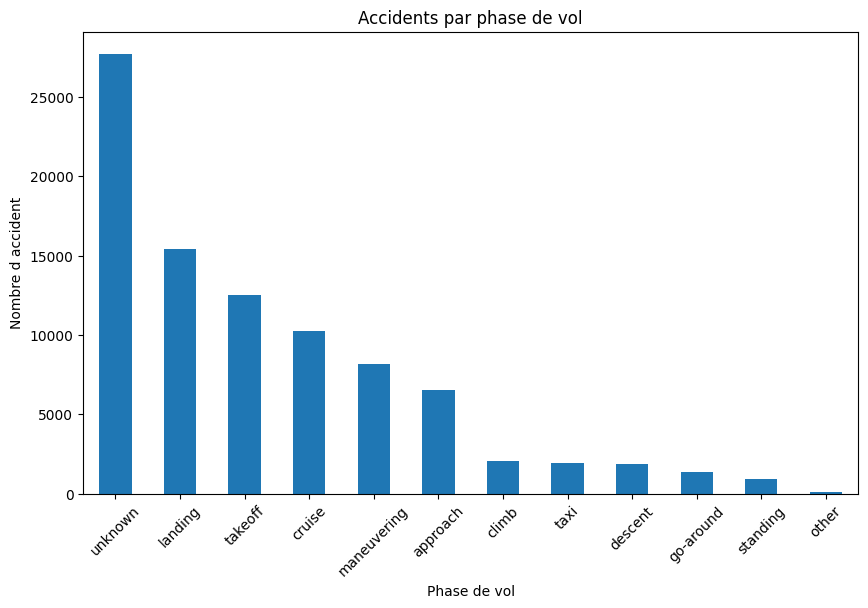

In [27]:
# Accidents by flight phase
phase_counts = data['Broad.phase.of.flight'].value_counts()
plt.figure(figsize=(10,6))
phase_counts.plot(kind='bar')
plt.title('Accidents par phase de vol')
plt.ylabel('Nombre d accident')
plt.xlabel('Phase de vol')
plt.xticks(rotation=45)
plt.show()

#### Remarques ‚úàÔ∏è

---
##### ‚úÖ Mod√®les d‚Äôavions les plus s√ªrs
Les **Cessna 172** et **Piper PA-28** enregistrent un nombre √©lev√© d‚Äôaccidents, mais pr√©sentent un **faible taux de mortalit√© par accident**, ce qui en fait des **options relativement s√ªres**.



##### üå¶Ô∏è Impact des conditions m√©t√©orologiques
La majorit√© des accidents surviennent en **conditions m√©t√©orologiques de vol √† vue (VMC)**.  
Cependant, les **conditions de vol aux instruments (IMC)** sont associ√©es √† des **taux de mortalit√© plus √©lev√©s**.



##### ‚ö†Ô∏è Phases critiques du vol
Le **d√©collage** et l‚Äô**atterrissage** repr√©sentent **plus de 40‚ÄØ% des accidents**.  
Cela indique que ces phases exigent une **attention particuli√®re** en mati√®re de **formation** et de **proc√©dures de s√©curit√©**.

---



### Recommendations

---
#### üõ©Ô∏è Acquisition d‚Äôa√©ronefs
Envisager l‚Äôachat des mod√®les **Cessna 172 et Piper PA-28**, en raison de leurs bons ant√©c√©dents en mati√®re de s√©curit√© et de leurs faibles taux de mortalit√© par accident.

#### üë®‚Äç‚úàÔ∏è Formation des pilotes
Investir dans une formation sp√©cialis√©e pour les proc√©dures de d√©collage/atterrissage et le pilotage en conditions IMC (vol aux instruments), afin de r√©duire les risques d‚Äôaccident.

#### üìã Politiques op√©rationnelles
Mettre en place des protocoles m√©t√©orologiques stricts et exiger la ma√Ætrise du vol aux instruments pour tous les pilotes, afin d‚Äôatt√©nuer les risques li√©s aux conditions m√©t√©orologiques.

---